### Dataset and Sampling
--------------------------

We used the following datasets.

1) MovieLens 100k Dataset :  100,000 ratings from 1000 users on 1700 movies. <br>
2) MovieLens 1M Dataset: 1 million ratings from 6000 users on 4000 movies. <br>

We sampled rating matrices of sizes 250K (2950 users, 2000 movies), 500K (4500 users, 2600 movies), 750K (5600 users, 3100 movies) from 1 million rating matrix. The above rating matrices are sampled by doing random sampling among the users and movies, thus reducing the size of 1 million rating matrix. The sampling criteria used is consistency in the density of the rating matrix.

# Objective
------------
Our goal is to build a system that recommends movies that are highly relevant to a given user, based on the user's rating history. In order to achieve this, our system must accurately predict the unrated items for all users. A highly accurate system allows us to recommend relevant movies by simply suggesting the top k highest predictions for any given user. Therefore, our business objective will be to optimize our models based on the lowest root-mean-squared error(RMSE). We will also consider other metrics such as mean absolute error(MAE), precision, and run-time when making final decisions.


# Algorithms
------------
There are numerous algorithms in the scikit-surprise library that can be directly applied to our MovieLens dataset.
In order to select the best one for our dataset, we systematically tested most of these algorithms and narrowed it down to a single best memory-based algorithm and a single best model-based algorithm.
We then compared the performance of these top two algorithms to determine the best overall algorithm for our recomender system.
Below is a list of the all the algorithms that we tested:

Baseline Approach 

Memory-based Approach: <br>
1) KNN Basic <br>
2) KNN with Means <br>
3) KNN with Zscore <br>
4) KNN Baseline <br>

Model-based Approach: <br>
1) NMF (Non-negative Matrix Factorization) <br>
2) SVD <br>

Our results from testing are exhibited below.

# Results
-----------
The following sections with explain the algorithms we used and discuss the results produced by running these algorithms

### Baseline Approach:



The algorithms in this section try to minimize the following regularized squared error: <br>

$$\sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).$$
 
b_u: the observed deviation of user u <br>
b_i: the observed deviation of item i <br>

Baselines can be estimated in the following two ways: <br>
Alternating Least Squares (ALS) <br>
The hyperparameters to be tuned are: <br>
	reg_i: the regularization parameters for items <br>
	reg_u: the regularization parameters for users <br>
	n_epochs: the number of iteration of the ALS procedure <br>

Stochastic Gradient Descent (SGD) <br>
The hyperparameters to be tuned are: <br>
	reg: the regularization parameter of the cost function that is optimized <br>
	learning_rate: the learning rate of SGD <br>
	n_epochs: the number of iteration of the SGD procedure <br>


### Baseline Results:

Code for Baseline approach can be found in "part1_baseline.ipynb"

In one of the KNN algorithms, KNNBaseline, we can take into account a baseline rating. We therefore did the grid search on baselines to find the optimal combination of hyper parameters giving the best performance and used the testing dataset to check the accuracy of our tuned model. While comparing the performance of two estimation methods, ALS and SGD, we found that the overall performance is better while using ALS (RMSE is lower), 94.33%, than using SGD, 94.41%. <br>
 
  ALS (RMSE: 94.33%) <br>
n_epochs: 20 <br>
reg_i: 1 <br>
reg_u: 5 <br>

SGD (RMSE: 94.41%) <br>
   learning_rate: 0.005 <br>
n_epochs: 50 <br>
reg: 0.02 <br>


### Memory-based Approach:

We used four different variations of KNN. They are KNN Basic, KNN with Means, KNN with Z-Score, KNN Baseline.  
Notation: <br>

k: The maximum number of neighbors to take into account <br>
$ N_i^k(u) $ : The set consisting of at most k neighbors of user u who have rated item i <br>
$ N_u^k(i) $ : The set consisting of at most k neighbors of item i rated by user u <br>
$ sim(u,v) $ : Similarity of user u to user v <br>
$ sim(i,j) $ : Similarity of item i to item j <br>


We used the following similarity metrics: Mean Squared Difference similarity (MSD), Cosine Similarity, Pearson Correlation Similarity, Pearson Correlation with Baseline Similarity.

Accuracy Metric used: RMSE (Root Mean Squared Error)

### i) KNN Basic: <br>
$\hat{r}_{ui}$ : Predicted rating of user u for item i <br>
User Based: <br>
$ \hat{r}_{ui} = \frac{
\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v) \cdot r_{vi}}
{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v)} $ 

Item Based: <br>
$ \hat{r}_{ui} = \frac{
\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j) \cdot r_{uj}}
{\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} $

### ii) KNN with Means:
Here we take into account the mean ratings of each user and mean ratings for each item in user-based and item-based approaches respectively. <br>

User Based: <br>
$ \hat{r}_{ui} = \mu_u + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - \mu_v)} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} $

Item Based: <br>
$ \hat{r}_{ui} = \mu_i + \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - \mu_j)} {\sum\limits_{j \in
N^k_u(i)} \text{sim}(i, j)} $

### iii) KNN with Z score: <br>
Here we take into account the z-score normalization of each user.

User Based: <br>
$ \hat{r}_{ui} = \mu_u + \sigma_u \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - \mu_v) / \sigma_v} {\sum\limits_{v
\in N^k_i(u)} \text{sim}(u, v)} $

Item Based: <br>
$ \hat{r}_{ui} = \mu_i + \sigma_i \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - \mu_j) / \sigma_j} {\sum\limits_{j
\in N^k_u(i)} \text{sim}(i, j)} $



### iv) KNN Baseline:

Here we take into account the baseline ratings. <br> 

User Based:

$ \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} $

Item Based: 

$ \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in
N^k_u(j)} \text{sim}(i, j)} $


### KNN Results:

"knn_tests_100k.py" : The source code to implement the KNN algorithms in Surprise (using 100k dataset) and run the grid search tests to find optimal hyperparameters for each algorithm. <br>

"KNNBaselineTests.py" : The source code used to analyze performance of our chosen memory-based algorithm (KNN Baseline) against larger datasets. <br>

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import csv

knn_CSVs = ["100k_KNNBasic_Results.csv", "100k_KNNWithMeans_Results.csv", 
            "100k_KNNWithZScore_Results.csv", "100k_KNNBaseline_Results.csv"]

df = pd.DataFrame()

for each_csv in knn_CSVs:
    temp_df = pd.read_csv(each_csv)
    sim_options_df = temp_df["sim_options"].apply(lambda x: pd.Series(re.split(" |,|:|}|\'", x)))
    temp_df.drop(temp_df.columns[[0, 5, 6, 7, 8]], axis=1, inplace=True)
    temp_df["similarity_metric"] = sim_options_df.iloc[0:, 5]
    temp_df["user-based?"] = sim_options_df.iloc[0:, 12]
    temp_df["algorithm"] = each_csv
    df = pd.concat([df, temp_df], ignore_index=True)

df.to_csv("100k_Results_Combined.csv")

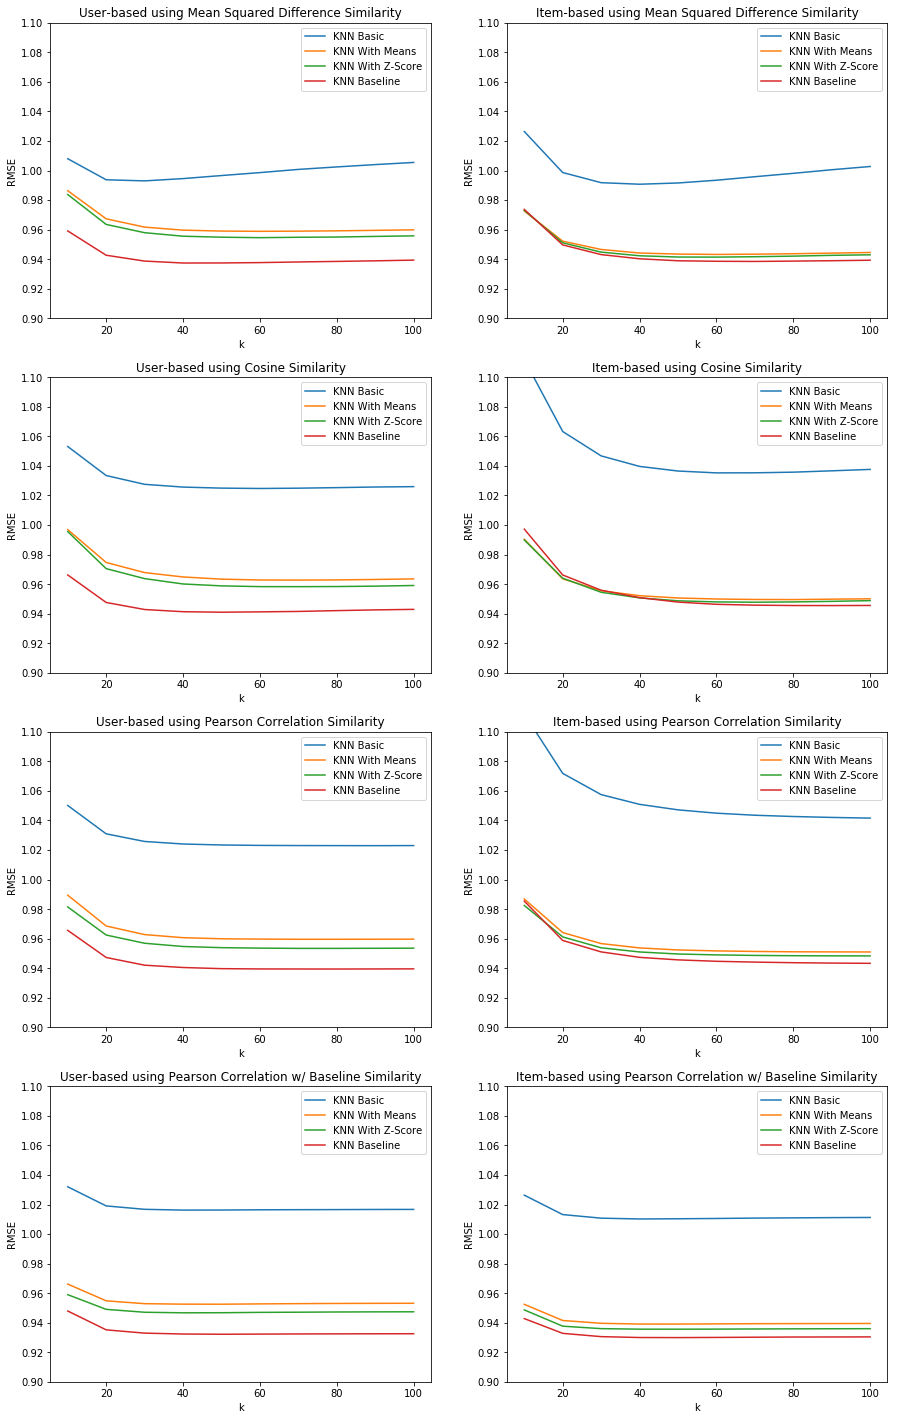

In [2]:
algorithm_dict = {"100k_KNNBasic_Results.csv": "KNN Basic", "100k_KNNWithMeans_Results.csv": "KNN With Means",
                  "100k_KNNWithZScore_Results.csv": "KNN With Z-Score", "100k_KNNBaseline_Results.csv": "KNN Baseline"}
metric_dict = {"msd": "Mean Squared Difference Similarity", "cosine": "Cosine Similarity", 
               "pearson": "Pearson Correlation Similarity", "pearson_baseline": "Pearson Correlation w/ Baseline Similarity"}
user_based_dict = {"True": "User-based", "False": "Item-based"}


def get_title(user_based, similarity_metric):
    return user_based_dict[user_based] + " using " + metric_dict[similarity_metric]

fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)
subplots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

subplot_dict = {0: ["True", "msd"], 1: ["False", "msd"],
                2: ["True", "cosine"], 3: ["False", "cosine"],
                4: ["True", "pearson"], 5: ["False", "pearson"],
                6: ["True", "pearson_baseline"], 7: ["False", "pearson_baseline"]}

error_metric = "RMSE"
for i in range(len(subplots)):
    is_user_based, similarity_metric = subplot_dict[i]
    for algorithm in knn_CSVs:
        filtered_df = df[(df["user-based?"] == is_user_based) & (df["similarity_metric"] == similarity_metric) & (df["algorithm"] == algorithm)]
        subplots[i].plot(filtered_df["k"], filtered_df[error_metric], label=algorithm_dict[algorithm])
        subplots[i].set_xlabel("k")
        subplots[i].set_ylabel(error_metric)
        subplots[i].set_title(get_title(is_user_based, similarity_metric))
        subplots[i].legend(loc="upper right")
        subplots[i].set_ylim(bottom=.9, top=1.1)
        subplots[i].set_yticks((.9, .92, .94, .96, .98, 1, 1.02, 1.04, 1.06, 1.08, 1.1))
plt.show()


The above graphs show the performance of all variations of KNN with different parameter values (Item based vs User based, different similarity metrics, different values of k) <br>

X-axis: parameter k (number of neighbors) <br>
Y-axis: RMSE (Accuracy Metric) <br>

Observe that in our case, KNN Baseline performs the best among all the variations of KNN.


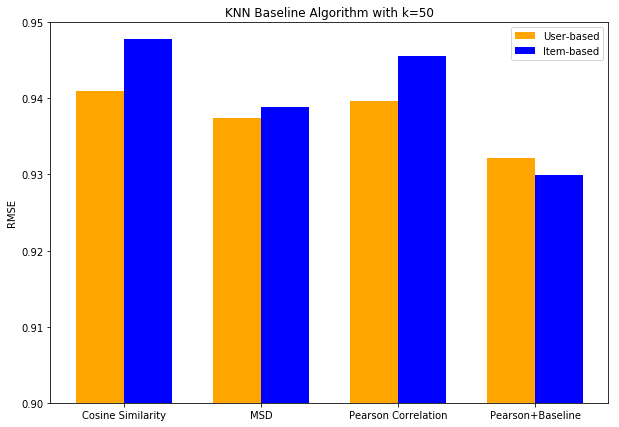

In [3]:
best_k = 50
filtered_df = df[(df["k"] == best_k) & (df["algorithm"] == "100k_KNNBaseline_Results.csv")]
best_user_based_errors = filtered_df[filtered_df["user-based?"] == "True"][error_metric]
best_item_based_errors = filtered_df[filtered_df["user-based?"] == "False"][error_metric]

num_of_sim_metric=4
bar_width = .35
ind = np.arange(num_of_sim_metric)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
rects1 = ax.bar(ind, best_user_based_errors, bar_width, color="orange")
rects2 = ax.bar(ind+bar_width, best_item_based_errors, bar_width, color="blue")

ax.set_ylabel(error_metric)
ax.set_title("KNN Baseline Algorithm with k={}".format(best_k))
ax.set_xticks(ind + bar_width / 2)
ax.set_yticks((.9, .91, .92, .93, .94, .95))
ax.set_ylim(bottom=.9, top=.95)
ax.set_xticklabels(('Cosine Similarity', 'MSD', 'Pearson Correlation', 'Pearson+Baseline'))

ax.legend((rects1[0], rects2[0]), ('User-based', 'Item-based'))
plt.show()

The above graph shows the performance of KNN Baseline algorithm over all the similarity metrics.

X – axis: Similarity Metrics <br>
Y – axis: RMSE <br>

Observe that Person + Baseline Similarity and item based model gives the best accuracy

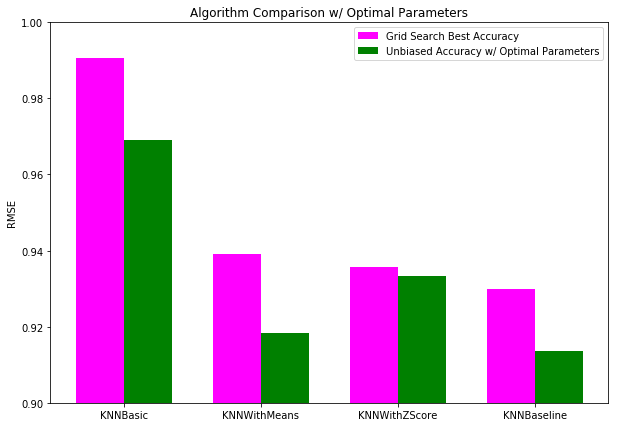

In [4]:
gridsearch_opt_accuracies = [0.990718028313, 0.939079136288, 0.935620684677, 0.929931954255]
unbiased_accuracies =[0.96899782698417969, 0.91831765436668245, 0.93329486881966095, 0.91349864307782735]

num_of_sim_metric=4
bar_width = .35
ind = np.arange(num_of_sim_metric)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
rects1 = ax.bar(ind, gridsearch_opt_accuracies, bar_width, color="magenta")
rects2 = ax.bar(ind+bar_width, unbiased_accuracies, bar_width, color="green")

ax.set_ylabel(error_metric)
ax.set_title("Algorithm Comparison w/ Optimal Parameters")
ax.set_xticks(ind + bar_width / 2)
ax.set_yticks((.9, .92, .94, .96, .98, 1))
ax.set_ylim(bottom=.9, top=1)
ax.set_xticklabels(('KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'KNNBaseline'))

ax.legend((rects1[0], rects2[0]), ('Grid Search Best Accuracy', 'Unbiased Accuracy w/ Optimal Parameters'))
plt.show()

The above graph shows the comparison of algorithms (KNN Basic, KNN with Means, KNN with Zscore, KNN Baseline) after getting their optimal hyper parameters (Item based vs User based, different similarity metrics, different values of k) by tuning. We divided the data set into training, validation and test sets. 20% of the data is partitioned into the test set. The remaining data is split into 5 folds and cross validation is performed. After the cross validation step, we retrained each model (corresponding to a different algorithm) with the optimal parameters on the combined validation and training set (80% of dataset). We then ran our model with optimal parameters on the unbiased test set (20% of dataset). <br>

X – axis: Algorithms <br>
Y – axis: RMSE <br>


Observe that the algorithms performs significantly better on the unbiased set (the test set). Which shows that the algorithms are not overfitted by the model parameters and they work better on new data. <br>

Upon tuning the hyperparameters for each variation of KNN, we got the following results. <br>

In [5]:
import tabulate
from IPython.display import HTML, display
table = [["Algorithm", "Best Parameters", "Grid Search Best Accuracy", "Unbiased Accuracy (RMSE)"],
    ["KNN Basic","Sim: MSD, item based, k = 40, min k = 5", 0.99071,0.96899],
         ["KNN with Means","Sim: Pearson Baseline, item based, k = 50, min k = 5", 0.93907,0.91831],
         ["KNN with Z-Score","Sim: Pearson Baseline, item based, k = 50, min k = 5", 0.93562,0.93329],
         ["KNN Baseline","Sim: Pearson Baseline, item based, k = 50, min k = 5", 0.92993,0.91349]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Algorithm,Best Parameters,Grid Search Best Accuracy,Unbiased Accuracy (RMSE)
KNN Basic,"Sim: MSD, item based, k = 40, min k = 5",0.99071,0.96899
KNN with Means,"Sim: Pearson Baseline, item based, k = 50, min k = 5",0.93907,0.91831
KNN with Z-Score,"Sim: Pearson Baseline, item based, k = 50, min k = 5",0.93562,0.93329
KNN Baseline,"Sim: Pearson Baseline, item based, k = 50, min k = 5",0.92993,0.91349


Given the above results, we decided to select the KNN Baseline as our chosen algorithm for the memory-based model.  We will now analyze the performance of our memory-based model with larger datasets to determine scalability. All memory-based models mentioned henceforth are assumed to be a KNN Basline algorithm with parameters shown in the table above. <br>

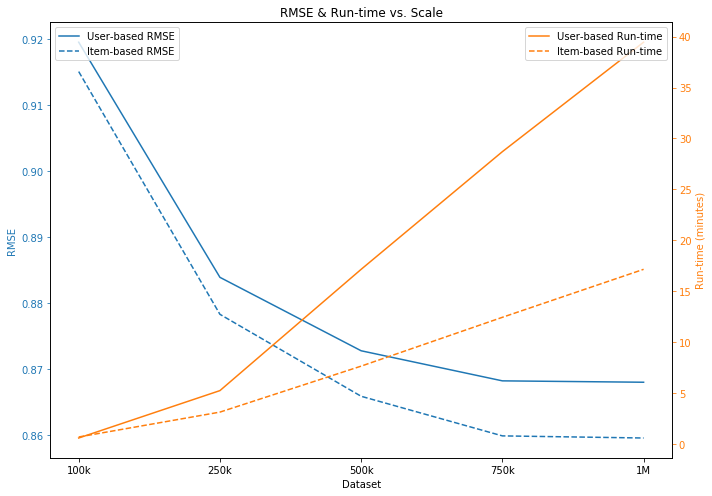

In [6]:
df = pd.read_csv("100k_to_1M_Results.csv")
user_based_df = df[(df["k"]==50) & (df["User-based?"]==True)]
item_based_df = df[(df["k"]==50) & (df["User-based?"]==False)]

x = [1,2,3,4,5]
dataset_sizes = user_based_df["Dataset"].tolist()

linestyle = "--"
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("RMSE & Run-time vs. Scale")
line1 = ax1.plot(x, user_based_df["RMSE"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["RMSE"], color="tab:blue", linestyle=linestyle)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("RMSE", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Running_Time_Minutes"], color="tab:orange")
line4 = ax2.plot(x, item_based_df["Running_Time_Minutes"], color="tab:orange", linestyle = linestyle)
ax2.set_ylabel("Run-time (minutes)", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based RMSE", "Item-based RMSE"), loc="upper left")
ax2.legend(("User-based Run-time", "Item-based Run-time"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()

The above graph shows the accuracy, runtime of user and item based algorithms with scale of the data set.
RMSE decreases as the scale of the dataset increases because the more data we have the better predictions we can make. The runtime of the algorithm increases as the scale of the data set increases. <br>

Our business goal is to predict movie ratings for a large user base and rating matrix. We observe that for the 1M ratings dataset (with 6000 users), the KNN Baseline algorithm takes about 40 min. <br>

Note: As Scalability is an issue for memory based models, our business solution is to re-run the models every 24 hours instead of real time changes. So any interactions between a user and item for a given day will only be reflected in tomorrow’s model. We recalculate the matrix offline every 24 hours. <br>

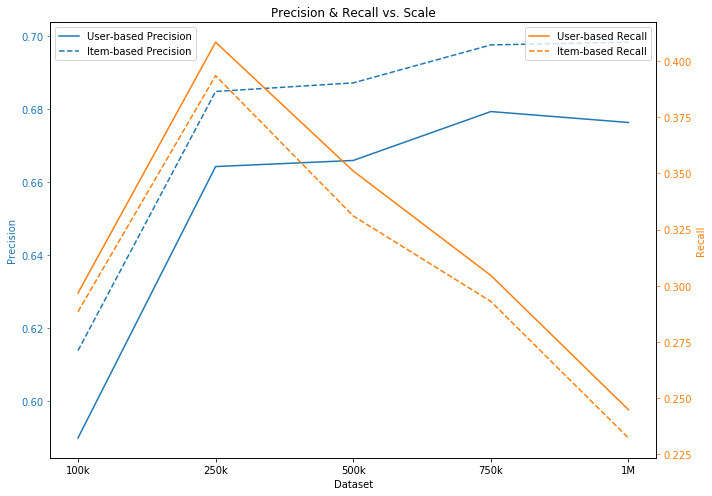

In [7]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("Precision & Recall vs. Scale")
line1 = ax1.plot(x, user_based_df["Precision"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["Precision"], color="tab:blue", linestyle=linestyle)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("Precision", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Recall"], color="tab:orange")
line4 = ax2.plot(x, item_based_df["Recall"], color="tab:orange", linestyle = linestyle)
ax2.set_ylabel("Recall", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based Precision", "Item-based Precision"), loc="upper left")
ax2.legend(("User-based Recall", "Item-based Recall"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()

Here is an example where we compute Precision@k and Recall@k for each user:

$ \text{Precision@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Recommended items} \} | } $  $ \text{Recall@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Relevant items} \} | } $ 

An item is considered relevant if its true rating $r_{ui}$ is greater than a given threshold. An item is considered recommended if its estimated rating $r̂_{ui}$ is greater than the threshold, and if it is among the k highest estimated ratings. Here we recommend k(=10) items(movies) and use a threshold of 3.0 to identify the true positives. <br>

The above graph shows the Precision and Recall vs Scale variation. Precision increases as the size of data set increases as we can make better predictions when there is more data. Recall decreases as the size of data set increases as the number of relevant recommendations increases, but the number of recommended movies does not increase as much. <br>

### Model-based Approach:

### i) NMF
NMF is an algorithm based on Non-negative Matrix Factorization. It is similar to SVD, but ensures that user and item factors are kept positive. When baselines are considered, the prediction is defined as:
$$\hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u$$

The optimization procedure is a regularized stochastic gradient descent, where the step size is specially chosen so user and item factors are positive, provided their initial values are also positive. At each iteration of SGD, the factors f or user u and item i are updated as follows:
$$\begin{split}p_{uf} &\leftarrow p_{uf} &\cdot \frac{\sum_{i \in I_u} q_{if}
\cdot r_{ui}}{\sum_{i \in I_u} q_{if} \cdot \hat{r_{ui}} +
\lambda_u |I_u| p_{uf}}\\
q_{if} &\leftarrow q_{if} &\cdot \frac{\sum_{u \in U_i} p_{uf}
\cdot r_{ui}}{\sum_{u \in U_i} p_{uf} \cdot \hat{r_{ui}} +
\lambda_i |U_i| q_{if}}\\\end{split}$$

$λ_u, λ_i$:regularization parameters



### ii)SVD
The prediction  of the SVD algorithm is defined as
$$\hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u$$

We try to minimize the following regularized squared error:
$$\sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right)$$

Stochastic gradient descent is used to minimize the error:

$$ \begin{split}b_u &\leftarrow b_u &+ \gamma (e_{ui} - \lambda b_u)\\
b_i &\leftarrow b_i &+ \gamma (e_{ui} - \lambda b_i)\\
p_u &\leftarrow p_u &+ \gamma (e_{ui} \cdot q_i - \lambda p_u)\\
q_i &\leftarrow q_i &+ \gamma (e_{ui} \cdot p_u - \lambda q_i)\end{split} $$

NMF.ipynb: The source code to vary various hyperparamenters and run the grid search to find the optimal hyperparameters for the NMF algorithms.

SVD.ipynb: The source code to vary hyperparameters and run the grid search to find the optimal hyperparamets for the SVD algorithm.

plot_data.ipynb: The source code to observe the comparision plot of NMF and SVD with respect to the number of latent factors. Results are dumped into the pickle file "nmf_svd_factor_plot.dat".

scale_data.ipynb: The source code to run the SVD algorithm on different datasets to see the results as the scale grows. Results are dumped into the csv file "scale_svd_results.csv".

### Model-based results

Upon tuning the hyperparameters for NMF and SVD, we got the following results. <br>
We know that NMF is prone to overfitting so we use small number of latent factors for NMF and tune the model with regularization values from [0.5,0.2,0.1,0.05,0.02,0.01] <br>

parameter tuning for nmf: <br>
latent factors = [5,10,15,20,25,30] <br>
regularization = [0.5,0.2,0.1,0.05,0.02,0.01] <br>
learning rate = [0.02,0.01,0.005,0.002,0.001] <br>
we use small learning rate for bias since bias is small (~1.0) <br>

for SVD we vary the latent factors from 20 to 120 <br>
latent factors = [20,30,40,50,60,70,80,90,100,110,120] <br>
regularizations = [0.5,0.2,0.1,0.05,0.02] <br>
learning_rates = [0.02,0.01,0.005,0.002] <br>

In [8]:
import tabulate
from IPython.display import HTML, display
table = [["Algorithm", "Best Parameters", "Grid Search Best Accuracy", "Unbiased Accuracy (RMSE)"],
    ["NMF","n_factors=20, reg_pu = 0.1, reg_qi = 0.1, reg_bu = 0.1, reg_bi = 0.1, lr_bu=0.001, lr_bi=0.001", 0.9364,0.9292],
         ["SVD","n_factors=80, reg_all = 0.1, lr_all=0.001", 0.9216,0.9494]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Algorithm,Best Parameters,Grid Search Best Accuracy,Unbiased Accuracy (RMSE)
NMF,"n_factors=20, reg_pu = 0.1, reg_qi = 0.1, reg_bu = 0.1, reg_bi = 0.1, lr_bu=0.001, lr_bi=0.001",0.9364,0.9292
SVD,"n_factors=80, reg_all = 0.1, lr_all=0.001",0.9216,0.9494


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

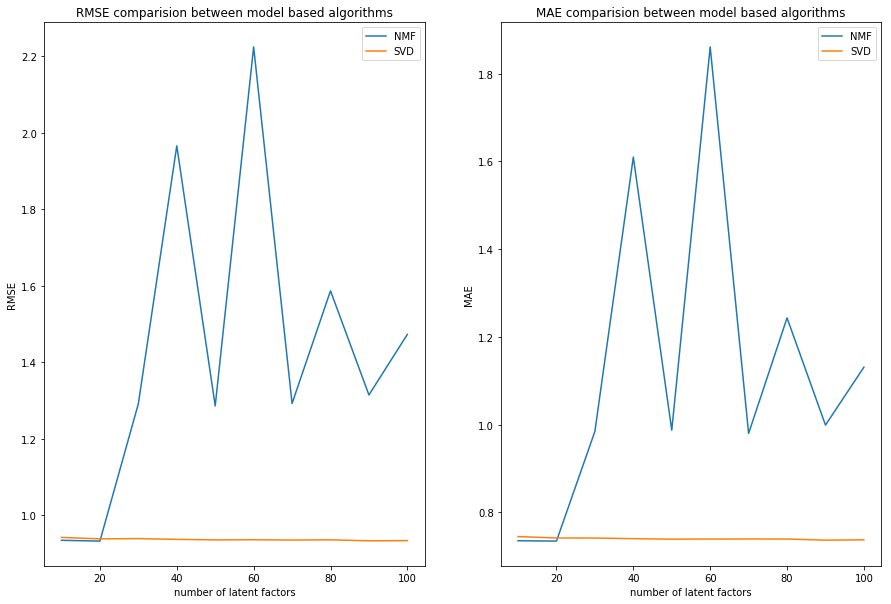

In [10]:
import pickle
res = pickle.load(open("nmf_svd_factor_plot.dat","rb"))
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
subplots = [ax1, ax2]
error_metric = ["RMSE","MAE"]
algorithms = ["NMF","SVD"]
latent_factors = [10,20,30,40,50,60,70,80,90,100]
data = {}
data[0] = {}
data[0]["NMF"] = [res['nmf'][x][0] for x in latent_factors]
data[0]["SVD"] = [res['svd'][x][0] for x in latent_factors]
data[1] = {}
data[1]["NMF"] = [res['nmf'][x][1] for x in latent_factors]
data[1]["SVD"] = [res['svd'][x][1] for x in latent_factors]

for i in range(len(subplots)):
    for algorithm in algorithms:
        subplots[i].plot(latent_factors, data[i][algorithm], label=algorithm)
        subplots[i].set_xlabel("number of latent factors")
        subplots[i].set_ylabel(error_metric[i])
        subplots[i].set_title(error_metric[i]+" comparision between model based algorithms")
        subplots[i].legend(loc="upper right")
plt.show()
fig.savefig('./nmf_svd_comparision.png')

As the number of latent factors grow, NMF is more prone to overfitting and difficult to tune. However, SVD performs better even with more latent factors and the results are comparable to NMF. <br>

Therefore, based on the results of this analysis, we choose to work with SVD. For the results of tuning the parameters for NMF and SVD, number of latent factors should be small for NMF to avoid over fitting the model or have high regularization terms. <br>

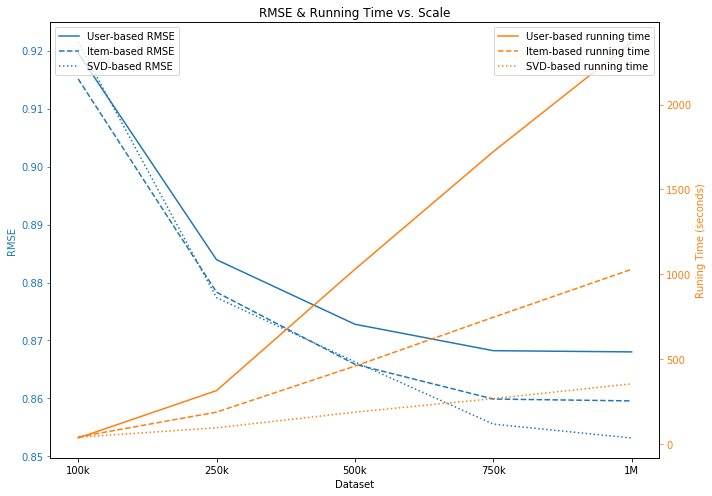

In [11]:
df = pd.read_csv("100k_to_1M_Results.csv")
svd_res = pd.read_csv("scale_svd_results.csv")
user_based_df = df[(df["k"]==50) & (df["User-based?"]==True)]
item_based_df = df[(df["k"]==50) & (df["User-based?"]==False)]
svd_res_df = svd_res

x = [1,2,3,4,5]
dataset_sizes = user_based_df["Dataset"].tolist()

linestyle = "--"
linestyle2 = ":"
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("RMSE & Running Time vs. Scale")
line1 = ax1.plot(x, user_based_df["RMSE"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["RMSE"], color="tab:blue", linestyle=linestyle)
line3 = ax1.plot(x, svd_res_df["RMSE"], color="tab:blue", linestyle=linestyle2)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("RMSE", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Running_Time_Minutes"]*60, color="tab:orange")
line4 = ax2.plot(x, item_based_df["Running_Time_Minutes"]*60, color="tab:orange", linestyle = linestyle)
line5 = ax2.plot(x, svd_res_df["Average_Running_Time"], color="tab:orange", linestyle = linestyle2)
ax2.set_ylabel("Runing Time (seconds)", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based RMSE", "Item-based RMSE", "SVD-based RMSE"), loc="upper left")
ax2.legend(("User-based running time", "Item-based running time", "SVD-based running time"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()
fig.savefig("time_rmse_scale.png")

From this plot, for the larger datasets, we can conclude that SVD(a model-based algorithm) outperforms the KNN Baseline model(memory-based algorithm) based on both RMSE and runtime. <br>
For the smaller datasets, both model-based and memory-based algorithms perform equally well and take the same amount of time to train and run.

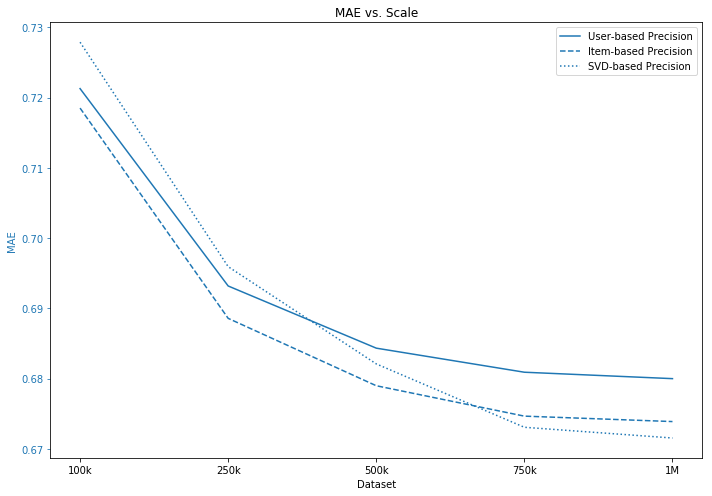

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("MAE vs. Scale")
line1 = ax1.plot(x, user_based_df["MAE"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["MAE"], color="tab:blue", linestyle=linestyle)
line3 = ax1.plot(x, svd_res_df["MAE"], color="tab:blue", linestyle=linestyle2)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("MAE", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax1.legend(("User-based Precision", "Item-based Precision", "SVD-based Precision"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()
fig.savefig("mae_scale.png")

Here we use MAE as comparison metrics for the three different algorithms. Again, its trend is similar to the RMSE. When the dataset is larger, SVD generally performs better than memory-based algorithm KNN. 

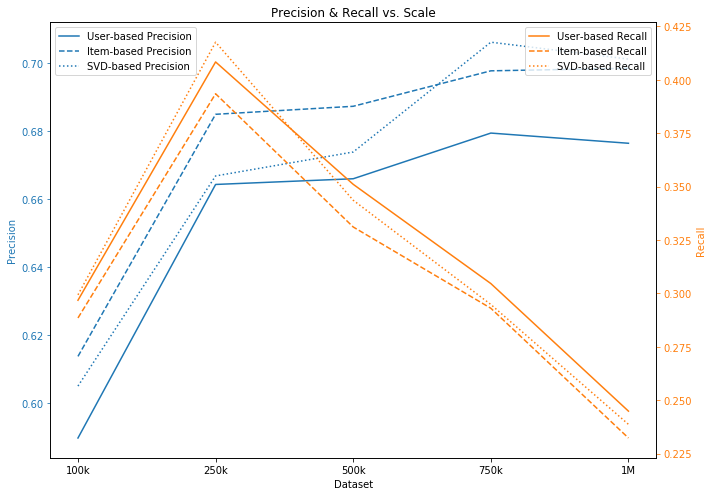

In [13]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("Precision & Recall vs. Scale")
line1 = ax1.plot(x, user_based_df["Precision"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["Precision"], color="tab:blue", linestyle=linestyle)
line3 = ax1.plot(x, svd_res_df["Precision"], color="tab:blue", linestyle=linestyle2)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("Precision", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Recall"], color="tab:orange")
line4 = ax2.plot(x, item_based_df["Recall"], color="tab:orange", linestyle = linestyle)
line5 = ax2.plot(x, svd_res_df["Recall"], color="tab:orange", linestyle = linestyle2)
ax2.set_ylabel("Recall", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based Precision", "Item-based Precision", "SVD-based Precision"), loc="upper left")
ax2.legend(("User-based Recall", "Item-based Recall", "SVD-based Recall"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()
fig.savefig("precision_recall_scale.png")

Here is an example where we compute Precision@k and Recall@k for each user:

$ \text{Precision@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Recommended items} \} | } $  $ \text{Recall@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Relevant items} \} | } $ 

An item is considered relevant if its true rating $r_{ui}$ is greater than a given threshold. An item is considered recommended if its estimated rating $r̂_{ui}$ is greater than the threshold, and if it is among the k highest estimated ratings. Here we recommend k(=10) items(movies) and use a threshold of 3.0 to identify the true positives. <br>

In comparison of memory-based and model-based algorithms, the trend of precision agrees with the trends RMSE and MAE. In all the cases as the data grows larger SVD performs better than the KNN models and we can make better predictions. <br>
Recall decreases as the size of data set increases as the number of relevant recommendations increases, but the number of recommended movies does not increase as much. <br>

# Conclusion
--------------
From the business perspective, it is essential to build a scalable system which can cater to the growing user base. We therefore need an algorithm that performs better with large scale and is fast. From the results section, we can see that SVD outperforms KNN-based algorithms in RMSE, MAE and precision on the large dataset. Since these metrics are good indicators for our recommendation system, we suggest to apply the model-based SVD algorithm over memory-based algorithms, to our personalized recommendation system.

We explore the dataset from the size of 100K to 1 million. If the dataset grows even larger, retraining SVD frequently will take time and the performance in terms of time will decrease. In order to tackle this problem, we plan to move on to different approaches which explore the application of nearest neighbors and content-based models. 